In [203]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def create_model_df(model_name):
    data_dir = os.path.join('..','group_evals','data')

    records = []
    for training_data_f in os.listdir(data_dir):
        if model_name not in training_data_f:
            continue
        h_type = training_data_f.split('_')[-2][-1]
        p_type = training_data_f.split('_')[-1].split('.')[0][-1]
        with open(os.path.join(data_dir, f'{model_name}_h{h_type}_p{p_type}.json')) as f:
            preds = json.load(f)

        true = np.load(os.path.join('..','splits','test',f'y_preprocessed_h{h_type}_p{p_type}.npy'))
        record = {
            'type' : model_name,
            'halflife' : h_type,
            'ignored_percent' : p_type,
            'true' : np.argmax(true,axis=1).astype(int),
            'predictions' : preds['preds_h0'],
            'params' : preds['params']
        }
        records.append(record)

    return pd.DataFrame.from_dict(records)



In [204]:

models = ['cnn','mlp','lstm','encoder_block','encoder_stack']
df = None

for model in models:
    model_df = create_model_df(model)
    if df is not None:
        df = pd.concat([df,model_df],axis=0,ignore_index=True)
    else:
        df = model_df

In [205]:
# len(df['predictions'].iloc[0][1])
df

,type,halflife,ignored_percent,true,predictions,params
0,cnn,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...",[],1650
1,cnn,1,1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[[0.026828642934560776, 0.008972088806331158, ...",1650
2,cnn,1,3,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[[0.6625003218650818, 0.574554443359375, 0.599...",1650
3,cnn,1,3,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[[0.6625003218650818, 0.574554443359375, 0.599...",1650
4,cnn,1,5,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[[0.7100387811660767, 0.7094760537147522, 0.65...",1650
5,cnn,1,8,"[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...","[[0.1548888087272644, 0.08828318864107132, 0.1...",1650
6,cnn,3,1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[[0.01042123045772314, 0.002960930345579982, 0...",1650
7,cnn,3,3,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[[0.9527340531349182, 0.6956800222396851, 0.69...",1650
8,cnn,3,3,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[[0.9527340531349182, 0.6956800222396851, 0.69...",1650
9,cnn,3,5,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[[0.07806632667779922, 0.03338002786040306, 0....",1650


In [206]:
from sklearn.metrics import accuracy_score


def create_accuracies_column(row):

    trues = row['true']
    preds = row['predictions']

    accs = []
    for pred in preds:
        sc = accuracy_score(trues,np.round(pred))
        accs.append(sc)
    return accs
df['accuracies'] = df.apply(lambda row : create_accuracies_column(row),axis=1)

In [207]:
df

,type,halflife,ignored_percent,true,predictions,params,accuracies
0,cnn,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...",[],1650,[]
1,cnn,1,1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[[0.026828642934560776, 0.008972088806331158, ...",1650,"[0.4981203007518797, 0.5075187969924813, 0.505..."
2,cnn,1,3,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[[0.6625003218650818, 0.574554443359375, 0.599...",1650,"[0.5071868583162218, 0.5051334702258727, 0.509..."
3,cnn,1,3,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[[0.6625003218650818, 0.574554443359375, 0.599...",1650,"[0.5071868583162218, 0.5051334702258727, 0.509..."
4,cnn,1,5,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[[0.7100387811660767, 0.7094760537147522, 0.65...",1650,"[0.5022222222222222, 0.5, 0.49777777777777776,..."
5,cnn,1,8,"[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...","[[0.1548888087272644, 0.08828318864107132, 0.1...",1650,"[0.4508816120906801, 0.48866498740554154, 0.48..."
6,cnn,3,1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[[0.01042123045772314, 0.002960930345579982, 0...",1650,"[0.6127819548872181, 0.631578947368421, 0.6165..."
7,cnn,3,3,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[[0.9527340531349182, 0.6956800222396851, 0.69...",1650,"[0.6283367556468172, 0.5400410677618069, 0.546..."
8,cnn,3,3,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[[0.9527340531349182, 0.6956800222396851, 0.69...",1650,"[0.6283367556468172, 0.5400410677618069, 0.546..."
9,cnn,3,5,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[[0.07806632667779922, 0.03338002786040306, 0....",1650,"[0.5777777777777777, 0.5488888888888889, 0.575..."


In [208]:
only_stats = df.loc[:,['type','halflife','ignored_percent','accuracies','params']]
only_stats.head(4)

,type,halflife,ignored_percent,accuracies,params
0,cnn,0,0,[],1650
1,cnn,1,1,"[0.4981203007518797, 0.5075187969924813, 0.505...",1650
2,cnn,1,3,"[0.5071868583162218, 0.5051334702258727, 0.509...",1650
3,cnn,1,3,"[0.5071868583162218, 0.5051334702258727, 0.509...",1650


In [209]:
only_stats['median_acc'] = only_stats['accuracies'].apply(lambda ls : np.median(ls))
only_stats['variance_acc'] = only_stats['accuracies'].apply(lambda ls : np.std(ls))
only_stats

D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)


,type,halflife,ignored_percent,accuracies,params,median_acc,variance_acc
0,cnn,0,0,[],1650,NaN,NaN
1,cnn,1,1,"[0.4981203007518797, 0.5075187969924813, 0.505...",1650,0.486842,0.020137
2,cnn,1,3,"[0.5071868583162218, 0.5051334702258727, 0.509...",1650,0.505133,0.027140
3,cnn,1,3,"[0.5071868583162218, 0.5051334702258727, 0.509...",1650,0.505133,0.027140
4,cnn,1,5,"[0.5022222222222222, 0.5, 0.49777777777777776,...",1650,0.502222,0.016808
5,cnn,1,8,"[0.4508816120906801, 0.48866498740554154, 0.48...",1650,0.493703,0.021446
6,cnn,3,1,"[0.6127819548872181, 0.631578947368421, 0.6165...",1650,0.609023,0.028647
7,cnn,3,3,"[0.6283367556468172, 0.5400410677618069, 0.546...",1650,0.564682,0.038170
8,cnn,3,3,"[0.6283367556468172, 0.5400410677618069, 0.546...",1650,0.564682,0.038170
9,cnn,3,5,"[0.5777777777777777, 0.5488888888888889, 0.575...",1650,0.557778,0.035142


<AxesSubplot:xlabel='median_acc', ylabel='variance_acc'>

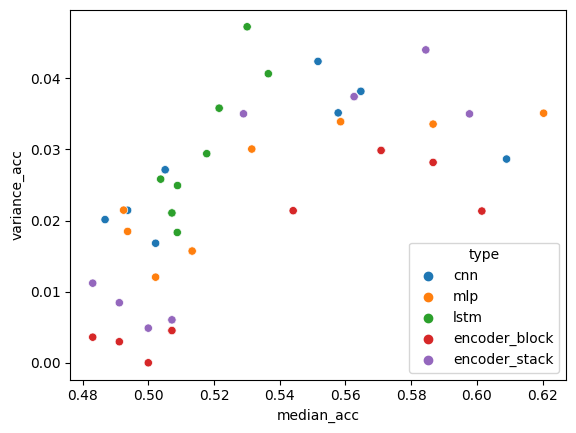

In [210]:
import seaborn as sns
sns.scatterplot(data=only_stats, x="median_acc", y="variance_acc", hue="type")

In [211]:
only_stats.groupby(['ignored_percent','type'])[['median_acc']].median()

median_acc
ignored_percent type                     
0               cnn                   NaN
                encoder_block         NaN
                encoder_stack         NaN
                lstm                  NaN
                mlp                   NaN
1               cnn              0.547932
                encoder_block    0.542293
                encoder_stack    0.540414
                lstm             0.516917
                mlp              0.556391
3               cnn              0.534908
                encoder_block    0.539014
                encoder_stack    0.534908
                lstm             0.514374
                mlp              0.535934
5               cnn              0.530000
                encoder_block    0.543333
                encoder_stack    0.542222
                lstm             0.513333
                mlp              0.544444
8               cnn              0.522670
                encoder_block    0.517632
                encoder_stack    0.510076
                lstm             0.522670
                mlp              0.512594

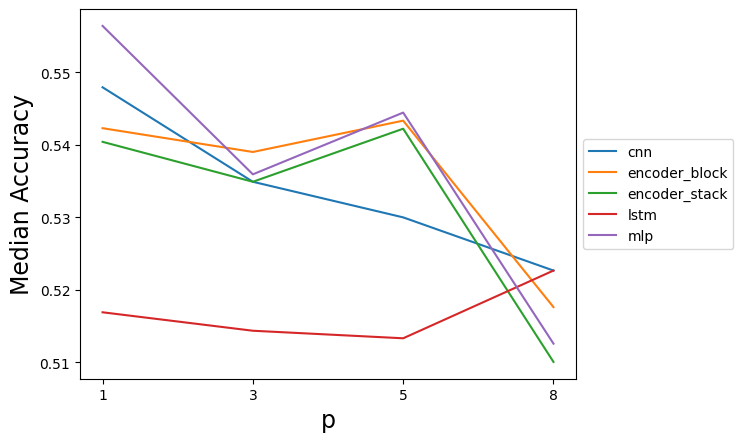

In [212]:
sns.lineplot(only_stats.groupby(by=['type','ignored_percent'])[['median_acc','variance_acc']].median().reset_index(),x='ignored_percent',y='median_acc',hue='type')
plt.ylabel('Median Accuracy',fontsize=17)
plt.xlabel('p',fontsize=17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(r'../documents/figures/p_effect_on_models.png')

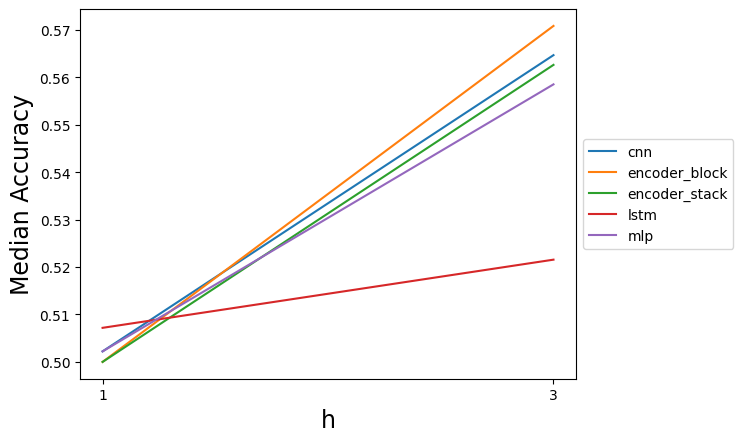

In [213]:
sns.lineplot(only_stats.groupby(by=['type','halflife'])[['median_acc','variance_acc']].median().reset_index(),x='halflife',y='median_acc',hue='type')
plt.ylabel('Median Accuracy',fontsize=17)
plt.xlabel('h',fontsize=17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(r'../documents/figures/h_effect_on_models.png')

In [214]:
only_stats.groupby(by=['type','ignored_percent'])[['median_acc','variance_acc']].median()

median_acc  variance_acc
type          ignored_percent                          
cnn           0                       NaN           NaN
              1                  0.547932      0.024392
              3                  0.534908      0.032655
              5                  0.530000      0.025975
              8                  0.522670      0.031911
encoder_block 0                       NaN           NaN
              1                  0.542293      0.012469
              3                  0.539014      0.017196
              5                  0.543333      0.014086
              8                  0.517632      0.012173
encoder_stack 0                       NaN           NaN
              1                  0.540414      0.023099
              3                  0.534908      0.021730
              5                  0.542222      0.024434
              8                  0.510076      0.021728
lstm          0                       NaN           NaN
              1                  0.516917      0.036534
              3                  0.514374      0.028435
              5                  0.513333      0.027162
              8                  0.522670      0.029485
mlp           0                       NaN           NaN
              1                  0.556391      0.028280
              3                  0.535934      0.024806
              5                  0.544444      0.022800
              8                  0.512594      0.024261

In [215]:
only_stats['ignored_percent'].value_counts()

3    20
8    10
1    10
5    10
0     5
Name: ignored_percent, dtype: int64

In [216]:
only_stats.groupby(['halflife','type'])[['median_acc']].median()

median_acc
halflife type                     
0        cnn                   NaN
         encoder_block         NaN
         encoder_stack         NaN
         lstm                  NaN
         mlp                   NaN
1        cnn              0.502222
         encoder_block    0.500000
         encoder_stack    0.500000
         lstm             0.507187
         mlp              0.502222
3        cnn              0.564682
         encoder_block    0.570842
         encoder_stack    0.562628
         lstm             0.521561
         mlp              0.558522

<AxesSubplot:xlabel='halflife', ylabel='median_acc'>

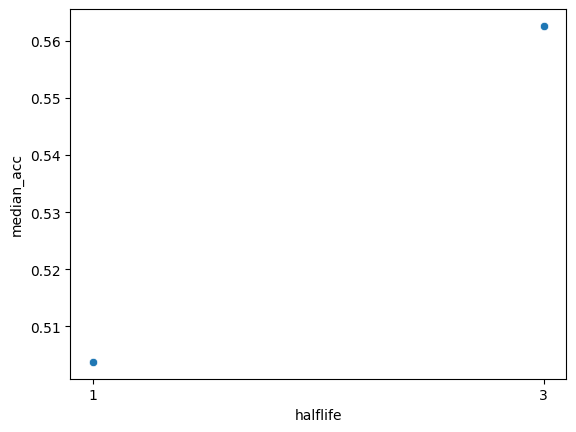

In [217]:
sns.scatterplot(only_stats.groupby('halflife')[['median_acc','variance_acc']].median().reset_index(),x='halflife',y='median_acc')

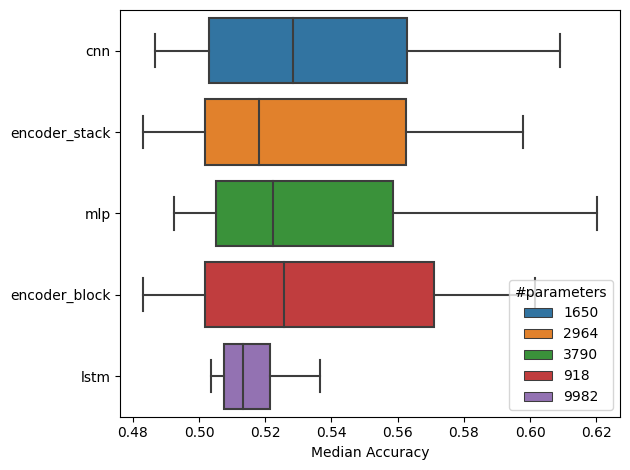

In [218]:
import matplotlib.pyplot as plt
g = sns.boxplot(data=only_stats.sort_values('params'), x="median_acc", y="type",hue='params',dodge=False)
g.get_legend().set_title("#parameters")
plt.ylabel('')
plt.xlabel('Median Accuracy')
plt.tight_layout()
plt.savefig('../documents/figures/global_accs.png')

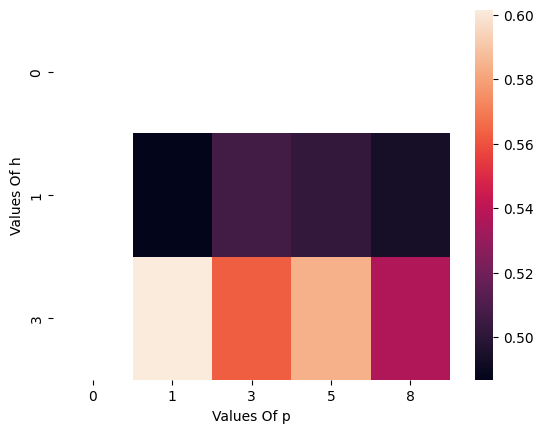

In [219]:
tmp = only_stats.groupby(['halflife','ignored_percent'])[['median_acc']].median()
sns.heatmap(tmp.reset_index().pivot('halflife','ignored_percent','median_acc'))
plt.ylabel("Values Of h")
plt.xlabel("Values Of p")
plt.savefig('../documents/figures/p_vs_h.png')

In [220]:
from sklearn.metrics import roc_auc_score

def create_auc_column(row):

    trues = row['true']
    preds = row['predictions']

    aucs = []
    for pred in preds:
        sc = roc_auc_score(trues,pred)
        aucs.append(sc)
    return np.median(aucs)
only_stats['aucs'] = df.apply(lambda row : create_auc_column(row),axis=1)
only_stats.head()

D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dt

,type,halflife,ignored_percent,accuracies,params,median_acc,variance_acc,aucs
0,cnn,0,0,[],1650,NaN,NaN,NaN
1,cnn,1,1,"[0.4981203007518797, 0.5075187969924813, 0.505...",1650,0.486842,0.020137,0.509629
2,cnn,1,3,"[0.5071868583162218, 0.5051334702258727, 0.509...",1650,0.505133,0.027140,0.495783
3,cnn,1,3,"[0.5071868583162218, 0.5051334702258727, 0.509...",1650,0.505133,0.027140,0.495783
4,cnn,1,5,"[0.5022222222222222, 0.5, 0.49777777777777776,...",1650,0.502222,0.016808,0.500464


In [221]:
only_stats.groupby('type')[['aucs']].median()

,aucs
type,
cnn,0.548521
encoder_block,0.551963
encoder_stack,0.556694
lstm,0.541845
mlp,0.550654
